패딩(padding)
  - 문장의 길이가 다를수 있으므로 병렬 연산을 위해서 모든 문장의 길이를 동일하게 맞춰야함
  - padding 이라고 하고 숫자는 0을 사용한다

In [1]:
# 텍스트 데이터를 정수로 변환(토큰화 -> 정수 인코딩)
# 가장 긴 문장의 길이를 구함(max_len)
# 짧은 문장에 0을 추가해서 max_le과 동일한 길이로 맞춤

numpy를 이용한 패딩

In [9]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
preprocess_sentences = [['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'],
                          ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'],
                          ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'],
                          ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'],
                          ['barber', 'went', 'huge', 'mountain']]
tokenizer =  Tokenizer()
tokenizer.fit_on_texts(preprocess_sentences)
encoded = tokenizer.texts_to_sequences(preprocess_sentences)

max_len  = max([len(sentence) for sentence in encoded])
print('max_len :', max_len)
print("encoded :",encoded)
for sentece in encoded:
  while len(sentece) < max_len:
    sentece.append(0)
padded_np = np.array(encoded)
padded_np


max_len : 7
encoded : [[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


array([[ 1,  5,  0,  0,  0,  0,  0],
       [ 1,  8,  5,  0,  0,  0,  0],
       [ 1,  3,  5,  0,  0,  0,  0],
       [ 9,  2,  0,  0,  0,  0,  0],
       [ 2,  4,  3,  2,  0,  0,  0],
       [ 3,  2,  0,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  2,  0,  0,  0,  0],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0,  0,  0]])

keras pad_sequence를 이용

In [18]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
preprocess_sentences = [['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'],
                          ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'],
                          ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'],
                          ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'],
                          ['barber', 'went', 'huge', 'mountain']]
tokenizer =  Tokenizer()
tokenizer.fit_on_texts(preprocess_sentences)
encoded = tokenizer.texts_to_sequences(preprocess_sentences)

# print(encoded)
# pad_sequences(encoded)  # 앞에서 채움
# pad_sequences(encoded, padding='post')  # 뒤에서 채움
# pad_sequences(encoded, padding='post', maxlen=5)  # 최대 길이가 5

last_value = len(tokenizer.word_index) + 1  # 단어 집합의 크기보다 1 큰 숫자를 사용
pad_sequences(encoded,padding='post', truncating='post' ,value=last_value)  # truncating='post' 길이가 길면 뒤에서 자름

array([[ 1,  5, 14, 14, 14, 14, 14],
       [ 1,  8,  5, 14, 14, 14, 14],
       [ 1,  3,  5, 14, 14, 14, 14],
       [ 9,  2, 14, 14, 14, 14, 14],
       [ 2,  4,  3,  2, 14, 14, 14],
       [ 3,  2, 14, 14, 14, 14, 14],
       [ 1,  4,  6, 14, 14, 14, 14],
       [ 1,  4,  6, 14, 14, 14, 14],
       [ 1,  4,  2, 14, 14, 14, 14],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13, 14, 14, 14]], dtype=int32)

원핫인코딩(one - hot - encording)
  - 컴퓨터는 단어보다는 숫자를 더 잘 처리
  - 단어집합(vocabulary) : 서로 다른 단어들의 모음
  - "나는 자연어 처리를 배운다"  [나,는,자연어,처리,를,배운다']
  - book books는 서로 다른 단어로 간주
  - 특정단어의 위치만 1로 하고 나머지는 0으로 채운 벡터

In [19]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 25.5 MB/s eta 0:00:00


In [22]:
from konlpy.tag import Okt
okt = Okt()
sentence = '나는 자연어 처리를 배운다'
tokens =  okt.morphs(sentence)
tokens

['나', '는', '자연어', '처리', '를', '배운다']

단어집합만들기

In [24]:
word_to_index = { word:index for index, word in enumerate(tokens) }
word_to_index

{'나': 0, '는': 1, '자연어': 2, '처리': 3, '를': 4, '배운다': 5}

원핫인코딩 함수

In [26]:
def one_hot_encoding(word,word_to_index):
  one_hot_vector = [0]*len(word_to_index) # 모든요소가 0인 벡터 생성
  index = word_to_index[word]  # 해당 단어의 인덱스를 찾기
  one_hot_vector[index] = 1
  return one_hot_vector

In [28]:
one_hot_encoding("나",word_to_index)

[1, 0, 0, 0, 0, 0]

케라스를 이용한 원핫인코딩

In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
sentence = '나는 자연어 처리를 배운다,자연어가 최고야'
# 토크나이저를 이용한 단어 집합 생성
tokenizer = Tokenizer()
tokenizer.fit_on_texts([sentence])
tokenizer.word_index

{'나는': 1, '자연어': 2, '처리를': 3, '배운다': 4, '자연어가': 5, '최고야': 6}

정수인코딩

In [35]:
sub_text = "자연어 배울래 자연어가 최고야"
encoded = tokenizer.texts_to_sequences([sub_text])[0]
encoded

[2, 5, 6]

원핫인코딩

In [36]:
to_categorical(encoded)

array([[0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])

원핫인코딩의 한계
  - 차원의증가
  - 단어 유사도를 반영하지 못함(강아지와 개는 유사한 의미지만 원핫은 전혀다른 단어로 인식)
    - Word2Vec, GloVe, FastText등의 임베딩 기법이 등장

- Word2Vec : 단어를 다차원 공간에서 의미적으로 가까운 벡터로 변환
- GloVe : 단어의 동시 출현 확률을 이용한 임베딩 기법
- FastText : 서브워드(subword)를 고려하여 유사한 단어도 유사한 벡터로 변환

데이터 분리

In [37]:
# 지도 학습에서 학습용과 훈련용
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [38]:
values = [['이것은 광고입니다.', 1],
          ['회의 일정 확인 부탁드립니다.', 0],
          ['(광고) 지금 구매하세요!', 1],
          ['안녕하세요, 오랜만입니다.', 0]]
columns = ['메일 본문', '스팸 여부']

In [39]:
df = pd.DataFrame(values, columns=columns)
df

,메일 본문,스팸 여부
0,이것은 광고입니다.,1
1,회의 일정 확인 부탁드립니다.,0
2,(광고) 지금 구매하세요!,1
3,"안녕하세요, 오랜만입니다.",0


In [40]:
# train / test 분리하기
x_train, x_test, y_train, y_test = train_test_split(df['메일 본문'], df['스팸 여부'], test_size=0.2, random_state=1234)

In [41]:
x_train.tolist()

['회의 일정 확인 부탁드립니다.', '(광고) 지금 구매하세요!', '안녕하세요, 오랜만입니다.']

- 언어모델
  - 단어 시퀀스에 확률을 할당하는 모델
  - 문장에서 다음에 올 단어를 예측하는 방식으로 학습
  - 통계적 접근법과 신경망 기반 접근법
  - BERT, GPT같은 신경망 모델이 우수함
- 언어모델 활용
  - 기계번역 : 올바른 문장 선택
  - 오타교정 : 문맥적으로 자연스러운 단어 선택
  - 음성인식 : 잘못된 인식 방지
- 단어시퀀스의 확률 계산     : n 그램 모델

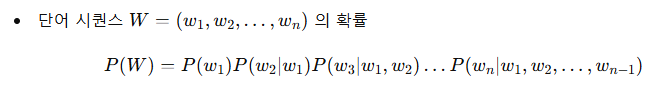

In [143]:
# 샘플 텍스트 데이터
corpus = [
    "선생님이 교실로 달려갔다",
    "오늘은 날씨가 매우 좋다",
    "그는 아침에 커피를 마셨다",
    "학교에 가는 길에 친구를 만났다",
    "고양이는 창밖을 바라보고 있었다",
    "나는 점심으로 김밥을 먹었다",
    "도서관에서 책을 읽고 있다",
    "비가 오는 날에는 우산을 챙겨야 한다",
    "엄마가 맛있는 저녁을 준비하고 계신다",
    "길을 걷다가 예쁜 꽃을 보았다",
    "버스 정류장에서 오래 기다렸다",
    "친구와 영화를 보고 재미있었다",
    "나는 저녁을 먹고 나서 산책을 했다",
    "아이는 공원에서 신나게 뛰어놀았다",
    "시험 공부를 열심히 해야 한다",
    "컴퓨터를 켜고 이메일을 확인했다",
    "그녀는 음악을 들으며 책을 읽었다",
    "우리는 함께 여행을 계획하고 있다",
    "강아지가 공을 물고 뛰어다녔다",
    "주말에는 등산을 가고 싶다",
    "오늘 아침은 조금 쌀쌀했다",
    "동생이 숙제를 도와달라고 했다",
    "비행기가 하늘을 가로질러 날아갔다",
    "나는 축구 경기를 보고 싶다",
    "책상 위에 연필과 공책이 놓여 있다",
    "지하철을 타고 회사에 출근했다",
    "새로운 스마트폰을 사고 싶다",
    "수영장에서 물놀이를 즐겼다",
    "어제 밤에는 별이 많이 보였다",
    "우리 가족은 주말마다 산책을 한다",
    "학교에서 과학 수업을 들었다",
    "나는 요리를 배우고 싶다",
    "어린이들이 놀이터에서 놀고 있다",
    "친구에게 생일 선물을 주었다",
    "밤하늘에 달이 밝게 빛났다",
    "운동을 하면 기분이 상쾌해진다",
    "여행 가방을 미리 준비해야 한다",
    "도시에는 높은 빌딩이 많다",
    "기차가 역에 도착했다",
    "음악을 들으면 마음이 편안해진다",
    "나는 수학 문제를 풀고 있다",
    "햄버거를 먹고 싶어서 가게에 갔다",
    "비가 와서 우산을 챙겼다",
    "바람이 시원하게 불어온다",
    "해변에서 조개를 주웠다",
    "아버지가 자동차를 운전하신다",
    "손을 씻고 밥을 먹었다",
    "학교 운동장에서 달리기 연습을 했다"
]

max_len = max([len(s) for s in [sentence.split() for sentence in corpus]])
max_len

6

In [181]:
import nltk
from nltk.util import ngrams
from collections import Counter, defaultdict
import random

# 데이터 전처리
tokenized_corpus = [sentence.split() for sentence in corpus]

# N-그램 생성 (여기서는 2-그램)
n = 2
ngrams_list = []
for sentence in tokenized_corpus:
  ngrams_list.extend(list(ngrams(sentence, n, pad_left=True, pad_right=True, left_pad_symbol="<s>", right_pad_symbol="</s>")))
print('ngrams_list :',ngrams_list)

# N-그램 확률 계산
ngram_counts = Counter(ngrams_list)
print('ngram_counts :',ngram_counts)

context_counts = Counter([ngram[0] for ngram in ngrams_list])
print('context_counts :',context_counts)

# 확률 계산 함수
def get_probability(context, word):
  context = context[0]
  # print(context,word,ngram_counts[(context, word)], context_counts[context])
  return ngram_counts[(context, word)] / context_counts[context] if context in context_counts else 0

# 다음 단어 예측 함수
def predict_next_word(context):
  candidates = {word: get_probability(context, word) for word in set(word for _, word in ngram_counts)}
  # print('candidates : ',candidates)
  return max(candidates, key=candidates.get) if candidates else None

# 예제 테스트
context = ["저녁을",]
next_word = predict_next_word(context)
print(f"'{context}' 다음에 올 확률이 가장 높은 단어: {next_word}")

ngrams_list : [('<s>', '선생님이'), ('선생님이', '교실로'), ('교실로', '달려갔다'), ('달려갔다', '</s>'), ('<s>', '오늘은'), ('오늘은', '날씨가'), ('날씨가', '매우'), ('매우', '좋다'), ('좋다', '</s>'), ('<s>', '그는'), ('그는', '아침에'), ('아침에', '커피를'), ('커피를', '마셨다'), ('마셨다', '</s>'), ('<s>', '학교에'), ('학교에', '가는'), ('가는', '길에'), ('길에', '친구를'), ('친구를', '만났다'), ('만났다', '</s>'), ('<s>', '고양이는'), ('고양이는', '창밖을'), ('창밖을', '바라보고'), ('바라보고', '있었다'), ('있었다', '</s>'), ('<s>', '나는'), ('나는', '점심으로'), ('점심으로', '김밥을'), ('김밥을', '먹었다'), ('먹었다', '</s>'), ('<s>', '도서관에서'), ('도서관에서', '책을'), ('책을', '읽고'), ('읽고', '있다'), ('있다', '</s>'), ('<s>', '비가'), ('비가', '오는'), ('오는', '날에는'), ('날에는', '우산을'), ('우산을', '챙겨야'), ('챙겨야', '한다'), ('한다', '</s>'), ('<s>', '엄마가'), ('엄마가', '맛있는'), ('맛있는', '저녁을'), ('저녁을', '준비하고'), ('준비하고', '계신다'), ('계신다', '</s>'), ('<s>', '길을'), ('길을', '걷다가'), ('걷다가', '예쁜'), ('예쁜', '꽃을'), ('꽃을', '보았다'), ('보았다', '</s>'), ('<s>', '버스'), ('버스', '정류장에서'), ('정류장에서', '오래'), ('오래', '기다렸다'), ('기다렸다', '</s>'), ('<s>', '친구와'), ('친구와', '영화를'), ('영화를', '보

In [203]:
context = ["비가",]
result = []
for i in range(max_len):
  next_word = predict_next_word(context)
  if next_word == "</s>":
    break
  result.append(next_word)
  context[0] = next_word

print(' '.join(result))


오는 날에는 우산을 챙겼다
